In [0]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:

# Training settings
batch_size = 64

In [0]:

# MNIST Dataset
train_dataset = datasets.CIFAR10(root='./data/',
                               train=True, # represents the training section of the data
                               transform=transforms.ToTensor(),
                               download=True)

Extracting ./data/cifar-10-python.tar.gz to ./data/


In [0]:
test_dataset = datasets.CIFAR10(root='./data/',
                              train=False, #validation set 
                              transform=transforms.ToTensor())

In [0]:
# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)


In [0]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [0]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        '''
        nn.Conv2d(in_channels, out_channels, kernel_size)
        in_channels - number of channels of the input
                    - for greyscale images we have 1, or basically a single channel
                    - for RGB images we have 3 channels and for sattelite date number can be higher.
        
        out_channels - number of different filters applied to the input images and the resulting images from the operation
                     - in our case is 10 at first conv, so we will have 10 different images as a result of filters applied
        '''
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 15, kernel_size=5)
        self.conv3 = nn.Conv2d(15, 20, kernel_size=5)
        self.mp = nn.MaxPool2d(2, None, 1, 1) # apply max pool with a window of 2X2
        self.fc = nn.Linear(540, 10) # final fully-connected layer

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.fc(x)
        return x

In [0]:
model = Net()

In [0]:
print(model)

Net(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 15, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(15, 20, kernel_size=(5, 5), stride=(1, 1))
  (mp): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=540, out_features=10, bias=True)
)


In [0]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

In [0]:

train_loss = []
validation_loss=[]
validation_accuracy=[]
train_accuracy=[]

In [0]:
def train(epoch):
    model.train()
    correct = 0
    losses=[]
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    train_loss.append(sum(losses)/len(losses))
    train_accuracy.append(correct* 100./len(train_loader.dataset))

In [0]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    losses=[]
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            # sum up batch loss
            loss= criterion(output, target)
            losses.append(loss.item())
            # get the index of the max log-probability
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).cpu().sum()

        test_loss = sum(losses)/len(losses)
        validation_loss.append(test_loss)
        validation_accuracy.append(100. * correct/len(test_loader.dataset))
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))

In [0]:
for epoch in range(1, 10):
    train(epoch)
    test()

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.301306
Train Epoch: 1 [640/50000 (1%)]	Loss: 2.313114
Train Epoch: 1 [1280/50000 (3%)]	Loss: 2.281745
Train Epoch: 1 [1920/50000 (4%)]	Loss: 2.300971
Train Epoch: 1 [2560/50000 (5%)]	Loss: 2.281323
Train Epoch: 1 [3200/50000 (6%)]	Loss: 2.295108
Train Epoch: 1 [3840/50000 (8%)]	Loss: 2.276255
Train Epoch: 1 [4480/50000 (9%)]	Loss: 2.274943
Train Epoch: 1 [5120/50000 (10%)]	Loss: 2.307755
Train Epoch: 1 [5760/50000 (12%)]	Loss: 2.263527
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.272027
Train Epoch: 1 [7040/50000 (14%)]	Loss: 2.241399
Train Epoch: 1 [7680/50000 (15%)]	Loss: 2.221204
Train Epoch: 1 [8320/50000 (17%)]	Loss: 2.250556
Train Epoch: 1 [8960/50000 (18%)]	Loss: 2.227275
Train Epoch: 1 [9600/50000 (19%)]	Loss: 2.160259
Train Epoch: 1 [10240/50000 (20%)]	Loss: 2.132273
Train Epoch: 1 [10880/50000 (22%)]	Loss: 2.160939
Train Epoch: 1 [11520/50000 (23%)]	Loss: 2.063429
Train Epoch: 1 [12160/50000 (24%)]	Loss: 2.123651
Train Epoch: 1 [12800/50000 

In [0]:
#matplotlib este folosit pentru a realiza grafice
import matplotlib.pyplot as plt
plt.style.use("ggplot")

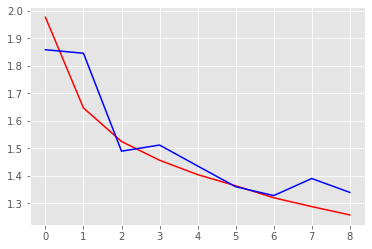

In [0]:
# Printăm comparativ cu roșu loss-ul de pe setul de validare și cu albastru loss-ul de pe setul de validare.
plt.plot(train_loss, "r-", validation_loss, "b-")

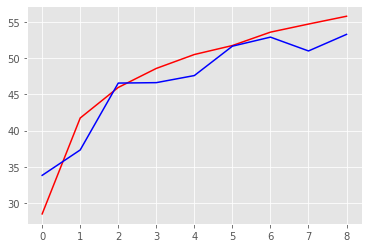

In [0]:

plt.plot(train_accuracy, "r-", validation_accuracy, "b-")